In [1]:
import pandas as pd
import numpy as np

In [2]:
#reading csv file
data=pd.read_csv('Dataset .csv')

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
data.shape

(9551, 21)

**data preprocessing**

In [6]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
#droping unwanted data
data.drop(['Restaurant ID', 'Restaurant Name', 'City', 'Cuisines','Address', 'Locality', 'Locality Verbose'], axis=1, inplace=True)

In [8]:
data.head()

,Country Code,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,121.027535,14.565443,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,162,121.014101,14.553708,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,162,121.056831,14.581404,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,162,121.056475,14.585318,1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,162,121.057508,14.584450,1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Encoding**

In [9]:
data['Rating color'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [10]:
data['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

In [12]:
data['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

In [13]:
data['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [14]:
data['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [15]:
data['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [16]:
data['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [25]:
data['Currency'] = label_encoder.fit_transform(data['Currency'])

In [27]:
data['Has Online delivery'] = label_encoder.fit_transform(data['Has Online delivery'])

In [28]:
data['Is delivering now'] = label_encoder.fit_transform(data['Is delivering now'])

In [29]:
data['Switch to order menu'] = label_encoder.fit_transform(data['Switch to order menu'])

In [30]:
data['Rating text'] = label_encoder.fit_transform(data['Rating text'])

In [31]:
data['Rating color'] = label_encoder.fit_transform(data['Rating color'])

In [32]:
data['Has Table booking'] = label_encoder.fit_transform(data['Has Table booking'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Longitude             9551 non-null   float64
 2   Latitude              9551 non-null   float64
 3   Average Cost for two  9551 non-null   int64  
 4   Currency              9551 non-null   int32  
 5   Has Table booking     9551 non-null   int64  
 6   Has Online delivery   9551 non-null   int32  
 7   Is delivering now     9551 non-null   int32  
 8   Switch to order menu  9551 non-null   int32  
 9   Price range           9551 non-null   int64  
 10  Aggregate rating      9551 non-null   float64
 11  Rating color          9551 non-null   int32  
 12  Rating text           9551 non-null   int32  
 13  Votes                 9551 non-null   int64  
dtypes: float64(3), int32(6), int64(5)
memory usage: 820.9 KB


**Splitting data**

In [35]:
y=data["Aggregate rating"]
x=data.drop("Aggregate rating",axis=1)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Model selection and training**

In [37]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  

model_rf.fit(x_train, y_train)

predictions_rf = model_rf.predict(x_test)

**Model evaluation**

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, predictions_rf)
print('R-squared:', r2)
mse = mean_squared_error(y_test, predictions_rf)
print('Mean Squared Error:', mse)

R-squared: 0.9862405524245305
Mean Squared Error: 0.031634936357382674


**analyzing most influential features**

In [41]:
importances = model_rf.feature_importances_
feature_importance_dict = dict(zip(x_train.columns, importances))
for feature, importance in feature_importance_dict.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Country Code, Importance: 4.340140603907775e-05
Feature: Longitude, Importance: 0.0036920978285269928
Feature: Latitude, Importance: 0.003478155811960153
Feature: Average Cost for two, Importance: 0.0018638326179030683
Feature: Currency, Importance: 3.873947551401378e-05
Feature: Has Table booking, Importance: 0.00013181251716140317
Feature: Has Online delivery, Importance: 0.0003886528973767302
Feature: Is delivering now, Importance: 4.234311108936159e-05
Feature: Switch to order menu, Importance: 0.0
Feature: Price range, Importance: 0.00026569628378581575
Feature: Rating color, Importance: 0.08147039212193788
Feature: Rating text, Importance: 0.007108412343472841
Feature: Votes, Importance: 0.9014764635852327


In [43]:
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_features = sorted_importances[:]
features = [feature[0] for feature in top_features]
importances = [feature[1] for feature in top_features]

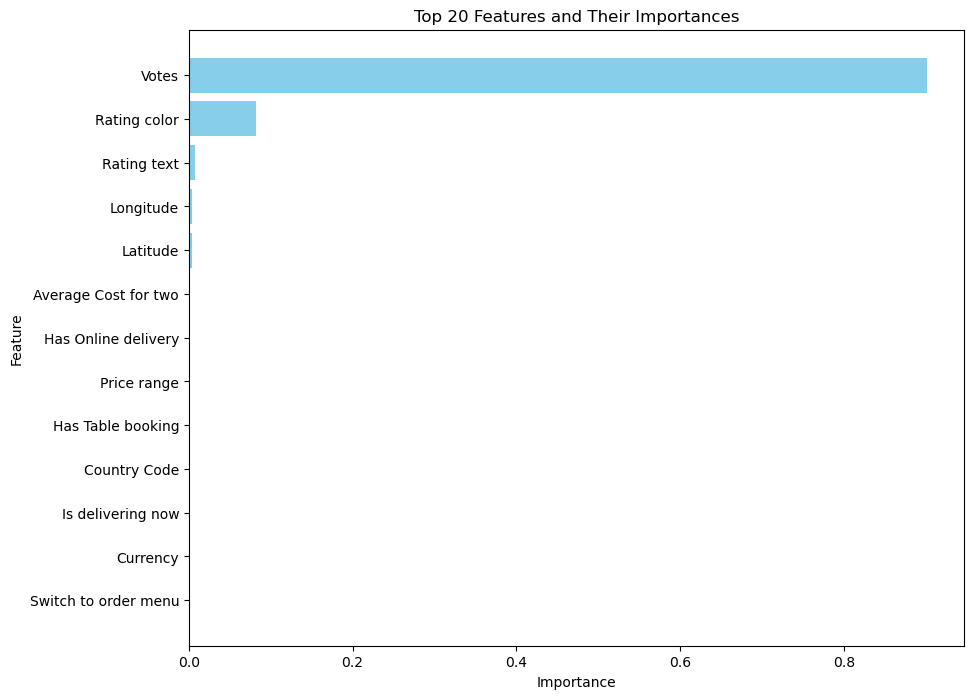

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features and Their Importances')
plt.gca().invert_yaxis()
plt.show()